In [1]:
import os
import sys
from PIL import Image

In [40]:
def compressMe(file, directorytocheck, directorytostore,qual,verbose=False):
	filepath = os.path.join(os.getcwd()+ "\\"+ directorytocheck, file)
	oldsize = os.stat(filepath).st_size
	picture = Image.open(filepath)
	dim = picture.size
	
	#set quality= to the preferred quality. 
	#I found that 85 has no difference in my 6-10mb files and that 65 is the lowest reasonable number
	picture.save(os.path.join(os.getcwd()+ "\\"+ directorytostore,"Compressed_"+file),"JPEG",optimize=True,quality=qual) 
	
	newsize = os.stat(os.path.join(os.getcwd()+ "\\"+ directorytostore,"Compressed_"+file)).st_size
	percent = (oldsize-newsize)/float(oldsize)*100
	if (verbose):
		print ("File compressed from {0} to {1} or {2}%".format(oldsize,newsize,percent))
	return percent


In [41]:
def compressfiles(directorytocheck,directorytostore,quality):
   
    #finds present working dir
    pwd = os.getcwd()+"\\"+ directorytocheck
    tot = 0
    num = 0
    
    for file in os.listdir(pwd):
        print(os.path.splitext(file))
        if os.path.splitext(file)[1].lower() in ('.bmp'):
            num += 1
            tot += compressMe(file,directorytocheck,directorytostore,quality)
    print ("Average Compression: %d" % (float(tot)/num))
    print ("Done")

In [46]:
Magnifications = [("85Xfiles",85),("75Xfiles",75),("65Xfiles",65)]

for i,j in Magnifications:
    compressfiles("100Xfiles",i,j)

('10', '.bmp')
('100', '.bmp')
('101', '.bmp')
('102', '.bmp')
('103', '.bmp')
('104', '.bmp')
('105', '.bmp')
('106', '.bmp')
('107', '.bmp')
('108', '.bmp')
('109', '.bmp')
('11', '.bmp')
('110', '.bmp')
('111', '.bmp')
('112', '.bmp')
('113', '.bmp')
('114', '.bmp')
('115', '.bmp')
('116', '.bmp')
('117', '.bmp')
('118', '.bmp')
('119', '.bmp')
('12', '.bmp')
('120', '.bmp')
('121', '.bmp')
('122', '.bmp')
('123', '.bmp')
('124', '.bmp')
('125', '.bmp')
('126', '.bmp')
('127', '.bmp')
('128', '.bmp')
('129', '.bmp')
('13', '.bmp')
('130', '.bmp')
('131', '.bmp')
('132', '.bmp')
('133', '.bmp')
('134', '.bmp')
('135', '.bmp')
('136', '.bmp')
('137', '.bmp')
('138', '.bmp')
('139', '.bmp')
('14', '.bmp')
('140', '.bmp')
('141', '.bmp')
('142', '.bmp')
('143', '.bmp')
('144', '.bmp')
('145', '.bmp')
('146', '.bmp')
('147', '.bmp')
('148', '.bmp')
('149', '.bmp')
('15', '.bmp')
('150', '.bmp')
('151', '.bmp')
('152', '.bmp')
('153', '.bmp')
('154', '.bmp')
('155', '.bmp')
('156', '.bmp'

(3, 7, 7)


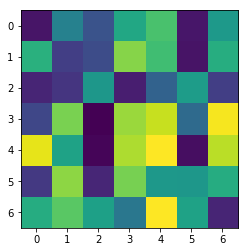

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [47]:
ex_img = np.random.randint(0,255,size = (3,7,7))
print(ex_img.shape)
plt.imshow(ex_img[1])
plt.show()
np.tile(np.repeat(np.arange(3),3),3)

An implementation of convoluation using a square kernel using numpy (in particular the fromFunction method in numpy) 
with conﬁgurable kernel size and stride on multi-channel images.

In [ ]:
#convert image patch i.e receptive field to the columns   
#input : Image , kernel size , stride , padding 
#output : Patches copied over all movements over the image [kernelsize * noofmovements](verticle and horizontal)
def ConvertImagetoColumn(X,kernel_w,kernel_h,stride = 1, padding = 0):
    Training_size , Channel_count, Img_H, Img_W = X.shape
    #apply padding 
    X_padded = np.pad(X,((0,0),(0,0),(p,p),(p,p)),"constant") #tuple represent padding before and after in every dimension first 2 dimensions are training and channel
    Output_W = ((Img_W - kernel_w + 2 * padding)/ stride )  + 1
    Output_H = ((Img_H - kernel_h + 2 * padding)/ stride )  + 1
    dummy  = np.tile(np.repeat(np.arange(kernel_h),kernel_w),Channel_count)
    
    

In [72]:
def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
    # First figure out what the size of the output should be
    N, C, H, W = x_shape
    assert (H + 2 * padding - field_height) % stride == 0
    assert (W + 2 * padding - field_height) % stride == 0
    out_height = (H + 2 * padding - field_height) // stride + 1
    out_width = (W + 2 * padding - field_width) // stride + 1
    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    print(i0)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)

    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)
    return k, i, j
def im2col_indices(x, field_height, field_width, padding=1, stride=1):
    """ An implementation of im2col based on some fancy indexing """
    # Zero-pad the input
    p = padding
    x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding,
                                 stride)
    print(k , " _______",  i, "           _________", j)
    cols = x_padded[:, k, i, j]
    C = x.shape[1]
    cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
    return cols



In [73]:
ex_img = np.random.randint(0,255,size = (1,3,5,5))
cols = im2col_indices(ex_img,3,3,0,1)

[0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]  _______ [[0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]
 [2 2 2 3 3 3 4 4 4]]            _________ [[0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3]
 [2 3 4 2 3 4 2 3 4]
 [0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3]
 [2 3 4 2 3 4 2 3 4]
 [0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3]
 [2 3 4 2 3 4 2 3 4]
 [0 1 2 0 1 2 0 1 2]


In [61]:
cols.shape

(27, 9)